### Text Pre-processing for NLP classification

In [1]:
# load the batch data
import pandas as pd
df2 = pd.read_csv('C:/Users/yippe/OneDrive/Documents/Data/Amazon_Reviews/batch_reviews_eda_sentiment_2.csv')

In [3]:
# Check dataset
df2.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Compound,Sentiment
0,US,42521656.0,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5.0,0.0,0.0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",2015-08-31,0.8096,Positive
1,US,12049833.0,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5.0,0.0,0.0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31,0.6915,Positive
2,US,107642.0,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5.0,0.0,0.0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,2015-08-31,0.8286,Positive
3,US,6042304.0,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5.0,0.0,0.0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,2015-08-31,0.8500,Positive
4,US,18123821.0,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5.0,0.0,0.0,N,Y,Five Stars,good,2015-08-31,0.4404,Positive


In [4]:
# Create a new column called 'Rating'
df2['Rating'] = df2.loc[:, 'star_rating']

# Label the reviews as either positive or negative based on ratings
# 0 = Negative (rating score <= 3)
# 1 = Positive (rating score > 3)
df2.loc[df2['Rating'] <= 3, 'Rating'] = 0
df2.loc[df2['Rating'] > 3, 'Rating'] = 1

In [5]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [6]:
# takes like 30 mins
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # change text to lower case
    text = text.lower()
    
    # Tokenization list and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove words containing numbers from token list
    text = [word for word in text if not any(a.isdigit() for a in word)]
    
    # remove stop words
    stp_words = stopwords.words('english')
    text = [x for x in text if x not in stp_words]
    
    # remove empty tokens
    text = [y for y in text if len(y) > 0]
    
    # Lemmatize the text
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(y[0], get_wordnet_pos(y[1])) for y in pos_tags]
    
    # remove words that contain only 1 letter
    text = [y for y in text if len(y) > 1]
    
    # join everything
    text = " ".join(text)
    return text

df2['review_body'] = df2['review_body'].apply(clean_text)

In [7]:
# check the data
df2[['review_body','Rating']].head()

,review_body,Rating
0,family allergic wheat dairy egg nuts several t...,1.0
1,favorite nut creamy crunchy salty slightly swe...,1.0
2,green tea taste good girlfriend love,1.0
3,love melissa's brand great second can't get me...,1.0
4,good,1.0


In [8]:
# Check the value count for rating
df2['Rating'].value_counts()

1.0    71855
0.0    15140
Name: Rating, dtype: int64

In [10]:
# create a csv for new batch analysis
# df2.to_csv(r'C:/Users/yippe/OneDrive/Documents/Data/Amazon_Reviews/batch_reviews_textprep.csv', index = False, header = True)

### Topic Modelling for Long Text

**Latent Dirichlet Allocation (LDA)** [[link]](https://www.analyticsvidhya.com/blog/2023/02/topic-modeling-using-latent-dirichlet-allocation-lda/)

In [11]:
# load the data batch
topic = pd.read_csv('C:/Users/yippe/OneDrive/Documents/Data/Amazon_Reviews/batch_reviews_textprep.csv')
topic.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Compound,Sentiment,Rating
0,US,42521656.0,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5.0,0.0,0.0,N,Y,Using these for years - love them.,family allergic wheat dairy egg nuts several t...,2015-08-31,0.8096,Positive,1.0
1,US,12049833.0,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5.0,0.0,0.0,N,Y,Wonderful,favorite nut creamy crunchy salty slightly swe...,2015-08-31,0.6915,Positive,1.0
2,US,107642.0,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5.0,0.0,0.0,N,N,Five Stars,green tea taste good girlfriend love,2015-08-31,0.8286,Positive,1.0
3,US,6042304.0,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5.0,0.0,0.0,N,Y,Five Stars,love melissa's brand great second can't get me...,2015-08-31,0.8500,Positive,1.0
4,US,18123821.0,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5.0,0.0,0.0,N,Y,Five Stars,good,2015-08-31,0.4404,Positive,1.0


In [15]:
# make a function to split strings into list of words
def convert(string):
    a = str(string)
    b = list(a.split(" "))
    return b

In [16]:
# apply onto topic dataset
topic['review_body'] = topic['review_body'].apply(convert)
topic = topic['review_body']

In [19]:
# takes about 1-2 hours
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer

# Create a dictionary from the preprocessed data
dictionary = Dictionary(topic)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

bow_corpus = [dictionary.doc2bow(text) for text in topic]

# Train the LDA model
num_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics = num_topics, id2word = dictionary, passes = 20, alpha = 'auto', eta = 'auto')

# Get the topics
topics = ldamodel.show_topics(num_topics = num_topics, num_words = 10, log = False, formatted = False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['coffee', 'tea', 'drink', 'cup', 'flavor', 'strong', 'green', 'bean', 'energy', 'morning']
Topic: 1
Words: ['sugar', 'br', 'mix', 'salt', 'food', 'free', 'organic', 'milk', 'add', 'powder']
Topic: 2
Words: ['use', 'make', 'water', 'add', 'oil', 'sauce', 'hot', 'bottle', 'coconut', 'cook']
Topic: 3
Words: ['get', 'one', 'try', 'like', 'find', 'time', 'buy', 'would', 'go', "i'm"]
Topic: 4
Words: ['taste', 'great', 'good', 'love', 'product', 'flavor', 'like', 'price', 'best', 'delicious']


**Word Clouds**

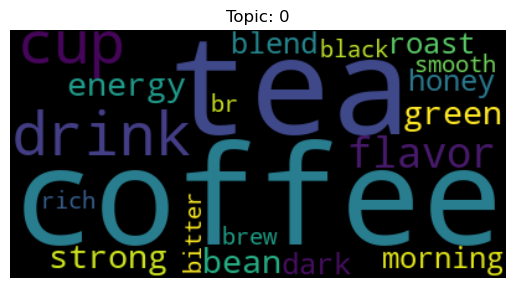

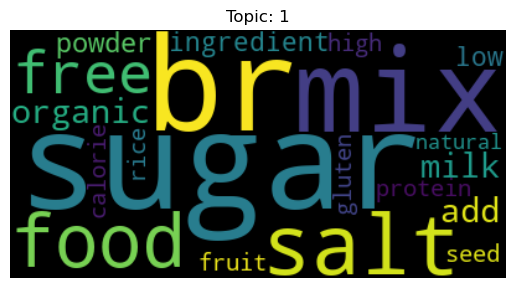

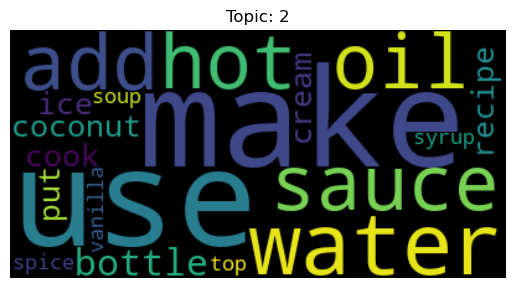

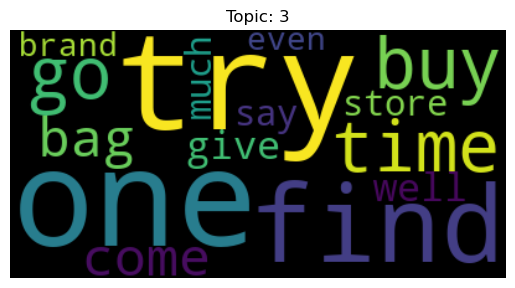

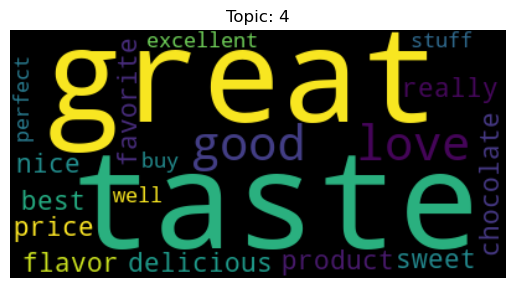

In [22]:
# Plotting a wordcloud of the topics from LDA analysis
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

for topic_id, topic in enumerate(ldamodel.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()

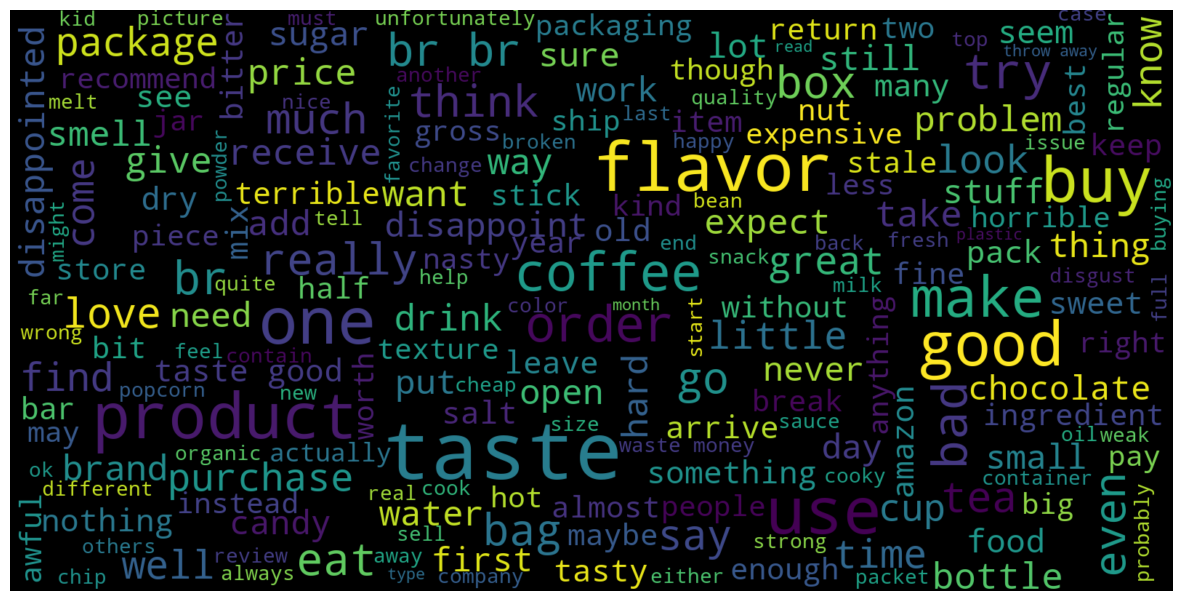

In [23]:
# Generate word cloud for negative reviews
from wordcloud import WordCloud
consolidated = " ".join(word for word in df2['review_body'][df2['Sentiment'] == 'Negative'].astype(str))

wordcloud = WordCloud(width = 1600,height = 800, random_state = 21, max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud.generate(consolidated), interpolation = 'bilinear')
plt.axis('off')
plt.show()

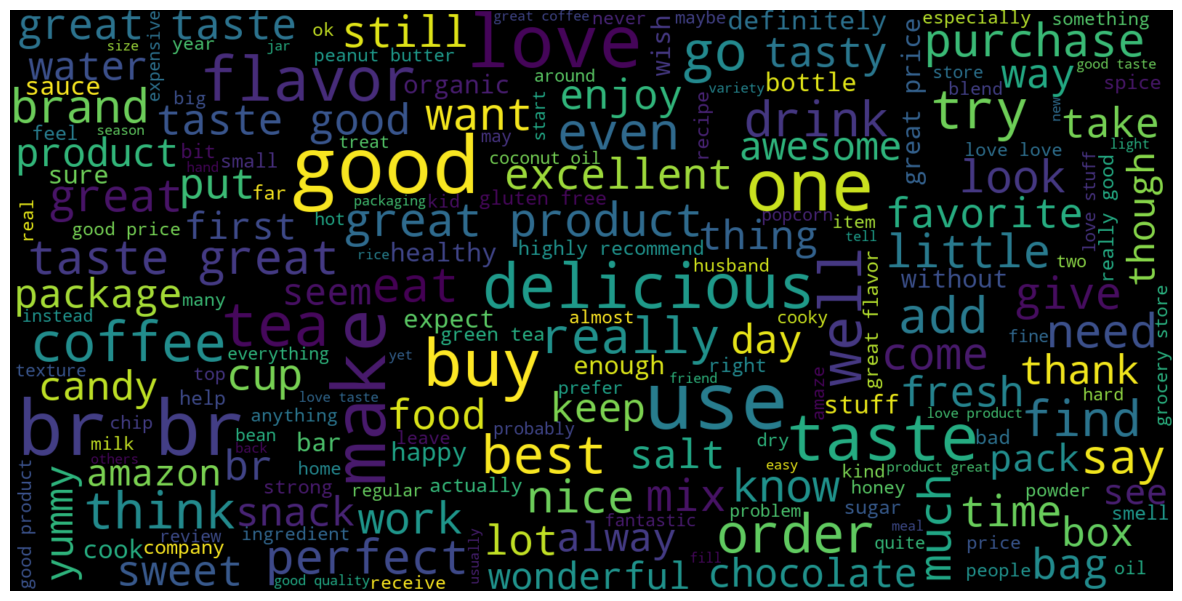

In [24]:
# Generate word cloud for positive reviews
from wordcloud import WordCloud
consolidated = " ".join(word for word in df2['review_body'][df2['Sentiment'] == 'Positive'].astype(str))
wordcloud = WordCloud(width = 1600, height = 800, random_state = 21, max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud.generate(consolidated), interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [26]:
# remove variable to ease memory use
del topic, dictionary, wordcloud

**Finding 4:** From LDA analysis, common topics mentioned in reviews involves multi-purpose seasoning, healthy sweet snacks, affordable quality coffee, and good packaging. For negative reviews specifically, we can see words like 'horrible', 'disappoint', 'nasty', and 'expensive' which we can assume that it has something to do with price, quality, or authencity of product. As for positive reviews, we can note words from word cloud such as 'tasty', 'excellent', 'yummy', and 'delicious' which also tells us that some products are satisfactory according to customers' demands and standards. 

In [27]:
# clearing garbage
# import gc 
# gc.collect()

14247